#  Predictive Model for Video Success

### **Project Description:**
#### The goal of this project is to develop a machine learning model that predicts the number of views a video is likely to receive based on several key attributes. These attributes include:


1. Content :The type or category of the video content, which can be used to analyze different types of content impact.
2. Video Title	:The title of the video, which might influence click-through rates and viewer engagement.
3. Video Publish Time :The date and time the video was published; can be used to identify trends by day, month, or year.
4. Subscribers Gained	:Number of new subscribers gained from this video.
5. Subscribers Lost	:Number of subscribers lost from this video, which can indicate content that may not resonate with viewers.
6. Comments Added	:Number of comments received, indicating viewer engagement and interest in the content.
7. Shares	:Number of times the video was shared, reflecting its potential virality() or viewer recommendation.
8. Dislikes	:Number of dislikes the video received, which may indicate negative sentiment.
9. Likes	:Number of likes the video received, a positive engagement metric.
10. Viewed (vs. Swiped Away) (%)	:Percentage of viewers who continued watching versus those who swiped away, showing initial engagement.
11. Shown in Feed	: Indicates whether the video was shown in users' feeds, possibly impacting impressions and visibility.
12. Average Percentage Viewed (%)	:Average percentage of the video watched by viewers, reflecting viewer retention and content engagement.
13. Views	:Total number of views for the video, representing its popularity.(Target Variable)
14. Watch Time (hours)	:Total hours watched for the video, providing insight into overall engagement and content stickiness.
15. Subscribers	:Total subscriber count at the time the video was published.
16. Average View Duration	:Average time a viewer spends watching the video, indicating content relevance or engagement.
17. Impressions	:Number of times the video thumbnail was shown to users, impacting the video's reach.
18. Impressions Click-Through Rate (%)	:Percentage of impressions that led to views, reflecting the effectiveness of the thumbnail and title.
19. Average View Duration (seconds)2	:The average view duration converted to seconds, allowing for easier quantitative analysis.

The dataset used for this project is sourced directly from my YouTube channel, containing real-world data on video performance. By analyzing these factors, the model aims to estimate the potential viewership of a video before it is uploaded or promoted. This can be highly valuable for content creators and marketers, helping them to make data-driven decisions about video content strategy, potential reach, and engagement.

### 1. **IMPORTING DATA**

In [1]:
#Importing libraries
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Display data in 2 decimal place
pd.options.display.float_format = '{:20.2f}'.format

In [3]:
#Reading data
df = pd.read_excel(r'G:\Study\DATA SCINCE\PROJECTS\POTFOLIO\Youtube\My YouTube data.xlsx')
df.head()

,Content,Video title,Video publish time,Subscribers gained,Subscribers lost,Comments added,Shares,Dislikes,Likes,Viewed (vs. swiped away) (%),Shown in feed,Average percentage viewed (%),Views,Watch time (hours),Subscribers,Average view duration,Impressions,Impressions click-through rate (%),Average view duration(seconds)2,Short_title
0,Total,NaN,NaT,61,20,37,222,1,184,57.14,14,35.38,5356,92.68,41,1900-03-02 00:01:02,26578,11.65,62,NaN
1,2X_nXrC0_3A,Nasty C - Born To Win feat Emtee,2022-09-16,10,0,5,62,0,33,NaN,0,48.54,1603,38.69,10,00:01:26,7610,12.85,86,Nasty C - Born To Win
2,k0xdbzHhBTU,J MINE (Travis Scott type beat),2019-03-03,8,1,2,14,0,14,NaN,0,52.07,72,0.46,7,00:00:22,247,12.55,22,J MINE
3,u1hRiuwSp1s,A Reece x Mashbeatz,2022-03-20,5,0,0,3,1,3,NaN,0,22.62,207,2.58,5,00:00:44,693,18.18,44,A Reece x Mashbeatz
4,CWxtQLBYUzU,Black Coffee Wish You were here sampled beat P...,2019-05-12,4,0,2,15,0,11,NaN,0,57.44,111,1.26,4,00:00:40,1469,3.27,40,Black Coffee Wish You


In [4]:
df['Views'].sum()-5356

5323

In [5]:
# data size
df.shape

(33, 20)

In [6]:
#Checking missing values
df.isna().sum()/df.shape[0]*100

Content                                              0.00
Video title                                          3.03
Video publish time                                   3.03
Subscribers gained                                   0.00
Subscribers lost                                     0.00
Comments added                                       0.00
Shares                                               0.00
Dislikes                                             0.00
Likes                                                0.00
Viewed (vs. swiped away) (%)                        93.94
Shown in feed                                        0.00
Average percentage viewed (%)                        0.00
Views                                                0.00
Watch time (hours)                                   0.00
Subscribers                                          0.00
Average view duration                                0.00
Impressions                                          0.00
Impressions cl

In [7]:

#Checking duplucates
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
dtype: bool

### 2. **DATA CLEANING & PREPROCESSING**

In [8]:
#Print data Columns
df.columns

Index(['Content', 'Video title', 'Video publish time', 'Subscribers gained',
       'Subscribers lost', 'Comments added', 'Shares', 'Dislikes', 'Likes',
       'Viewed (vs. swiped away) (%)', 'Shown in feed',
       'Average percentage viewed (%)', 'Views', 'Watch time (hours)',
       'Subscribers', 'Average view duration', 'Impressions',
       'Impressions click-through rate (%)', 'Average view duration(seconds)2',
       'Short_title'],
      dtype='object')

There are columns that are not useful in this dataset so, we gonna drop them 


In [9]:

#Selected columns
delete_columns = ['Content' ,'Viewed (vs. swiped away) (%)','Shown in feed','Average view duration']

In [10]:
#droping the first row and unuseful/useless columns

#drop row
df.drop(index=0,inplace=True)
#drop column

df.drop(columns=delete_columns,axis=1,inplace=True)

In [11]:
#display the last dataset
df.tail()

,Video title,Video publish time,Subscribers gained,Subscribers lost,Comments added,Shares,Dislikes,Likes,Average percentage viewed (%),Views,Watch time (hours),Subscribers,Impressions,Impressions click-through rate (%),Average view duration(seconds)2,Short_title
28,Emotional Elaine x Rowlene type beat 2022,2022-03-20,0,0,1,2,0,6,17.10,114,1.14,0,455,18.68,36,Emotional Elaine x Rowlene
29,Interlude,2019-06-14,0,0,1,4,0,2,44.68,16,0.10,0,120,7.50,23,Interlude
30,J_MINE-9 AM,2019-06-14,0,0,0,5,0,3,71.55,11,0.08,0,143,3.50,26,J_MINE-9 AM
31,Masego x Fkj RnB Pop Type Beat,2022-03-20,0,0,1,1,0,3,15.55,48,0.44,0,353,10.76,32,Masego x Fkj RnB Pop Type Beat
32,7 Best upcoming electric cars of 2019,2019-07-01,0,0,1,4,0,5,40.95,14,0.31,0,232,2.59,79,7 Best upcoming electric cars


In [12]:
df.shape

(32, 16)

Let  separate the "Video publish time" column into day, month, and year 

In [13]:
# Convert 'Video publish time' column to datetime format
df['Video publish time'] = pd.to_datetime(df['Video publish time'],format='%b %d, %Y')

# Extract day, month, and year into separate columns
df['Day'] = df['Video publish time'].dt.day
df['Month'] = df['Video publish time'].dt.month
df['Year'] = df['Video publish time'].dt.year

In [14]:
df.head()

,Video title,Video publish time,Subscribers gained,Subscribers lost,Comments added,Shares,Dislikes,Likes,Average percentage viewed (%),Views,Watch time (hours),Subscribers,Impressions,Impressions click-through rate (%),Average view duration(seconds)2,Short_title,Day,Month,Year
1,Nasty C - Born To Win feat Emtee,2022-09-16,10,0,5,62,0,33,48.54,1603,38.69,10,7610,12.85,86,Nasty C - Born To Win,16,9,2022
2,J MINE (Travis Scott type beat),2019-03-03,8,1,2,14,0,14,52.07,72,0.46,7,247,12.55,22,J MINE,3,3,2019
3,A Reece x Mashbeatz,2022-03-20,5,0,0,3,1,3,22.62,207,2.58,5,693,18.18,44,A Reece x Mashbeatz,20,3,2022
4,Black Coffee Wish You were here sampled beat P...,2019-05-12,4,0,2,15,0,11,57.44,111,1.26,4,1469,3.27,40,Black Coffee Wish You,12,5,2019
5,"Nasty C ""Can't Imagine "" Type Beat",2022-03-25,4,1,1,2,0,7,18.34,294,2.71,3,1263,14.09,33,Nasty C -Can't Imagine,25,3,2022


### **3. EDA Exploratory Data Analysis**

In [15]:
#Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 1 to 32
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Video title                         32 non-null     object        
 1   Video publish time                  32 non-null     datetime64[ns]
 2   Subscribers gained                  32 non-null     int64         
 3   Subscribers lost                    32 non-null     int64         
 4   Comments added                      32 non-null     int64         
 5   Shares                              32 non-null     int64         
 6   Dislikes                            32 non-null     int64         
 7   Likes                               32 non-null     int64         
 8   Average percentage viewed (%)       32 non-null     float64       
 9   Views                               32 non-null     int64         
 10  Watch time (hours)          

In [16]:

#Statistics Summary
df.describe()

,Video publish time,Subscribers gained,Subscribers lost,Comments added,Shares,Dislikes,Likes,Average percentage viewed (%),Views,Watch time (hours),Subscribers,Impressions,Impressions click-through rate (%),Average view duration(seconds)2,Day,Month,Year
count,32,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00
mean,2021-05-05 13:30:00,1.53,0.06,1.16,6.94,0.03,5.62,39.88,166.34,2.88,1.47,827.97,9.89,54.34,16.66,4.62,2021.00
min,2018-11-25 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,6.41,3.00,0.04,0.00,8.00,1.64,19.00,1.00,1.00,2018.00
25%,2019-06-17 00:00:00,0.00,0.00,0.00,1.75,0.00,2.00,26.73,36.75,0.41,0.00,206.00,6.05,35.50,9.00,3.00,2019.00
50%,2022-03-20 00:00:00,0.50,0.00,1.00,4.00,0.00,5.00,42.00,69.00,0.94,0.50,403.50,10.06,47.00,17.50,3.00,2022.00
75%,2022-09-16 00:00:00,2.00,0.00,2.00,8.75,0.00,7.25,48.06,181.50,2.13,2.00,1033.50,13.16,69.25,20.00,6.25,2022.00
max,2023-02-09 00:00:00,10.00,1.00,5.00,62.00,1.00,33.00,77.14,1603.00,38.69,10.00,7610.00,20.51,169.00,31.00,11.00,2023.00
std,NaN,2.44,0.25,1.14,11.14,0.18,6.15,17.52,302.98,6.95,2.33,1364.31,5.26,28.96,7.99,2.74,1.74


In [17]:
#let separate variables into  numeric/numbers and categorial

set(list(df.dtypes.tolist()))

{dtype('float64'),
 dtype('<M8[ns]'),
 dtype('int32'),
 dtype('int64'),
 dtype('O')}

In [18]:
sns.set_style('darkgrid')

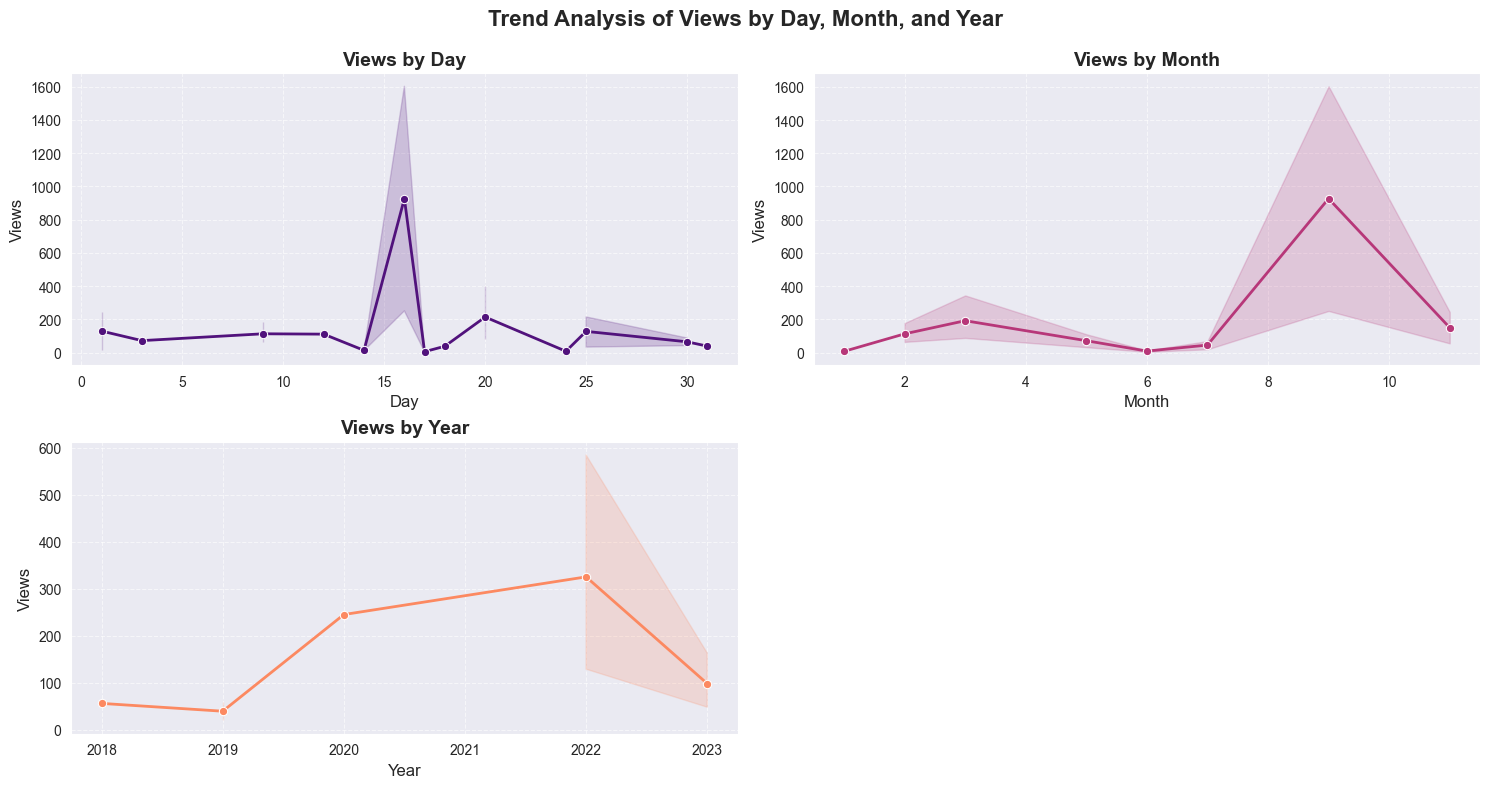

In [19]:
# Variables for this plot
df_line = ['Day', 'Month', 'Year']

# Choose a color palette for different lines
palette = sns.color_palette("magma", len(df_line))

#plotting a trends charts for views
plt.figure(figsize=(15, 8))
for i, col in enumerate(df_line):
    plt.subplot(2, 2, i+1)
    sns.lineplot(x=col,y='Views', data=df,marker='o', color=palette[i], linewidth=2, linestyle='-')

     # Title and axis labels with custom font sizes
    plt.title(f'Views by {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Views", fontsize=12)
    
    # Add grid with custom style
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.suptitle("Trend Analysis of Views by Day, Month, and Year", fontsize=16, fontweight='bold')
 # Adjust space for the main title
plt.subplots_adjust(top=0.9)
#show() plot
plt.show() 

By looking at the line charts we can see that there is a  pick on day 15 , and there also increase of views  between month 7 and 9 , and in years like 2019 to 2022

1. Views by Day: There's a noticeable spike on day 15, suggesting a possible pattern where more views are generated mid-month. This could be due to specific release dates, monthly events, or trends that drive viewership on that day.

2. Views by Month: Between July (7) and September (9), views increase significantly, peaking around September. This could indicate a seasonal trend or a time when content becomes more popular, possibly due to holidays or events relevant to the audience.

3. Views by Year: There’s a steady increase in views from 2019 to 2022, which suggests that the channel or content gained popularity over time. The drop after 2022 might be due to incomplete data for 2023 or a decrease in viewership or videos where not published/uploaded between those years.

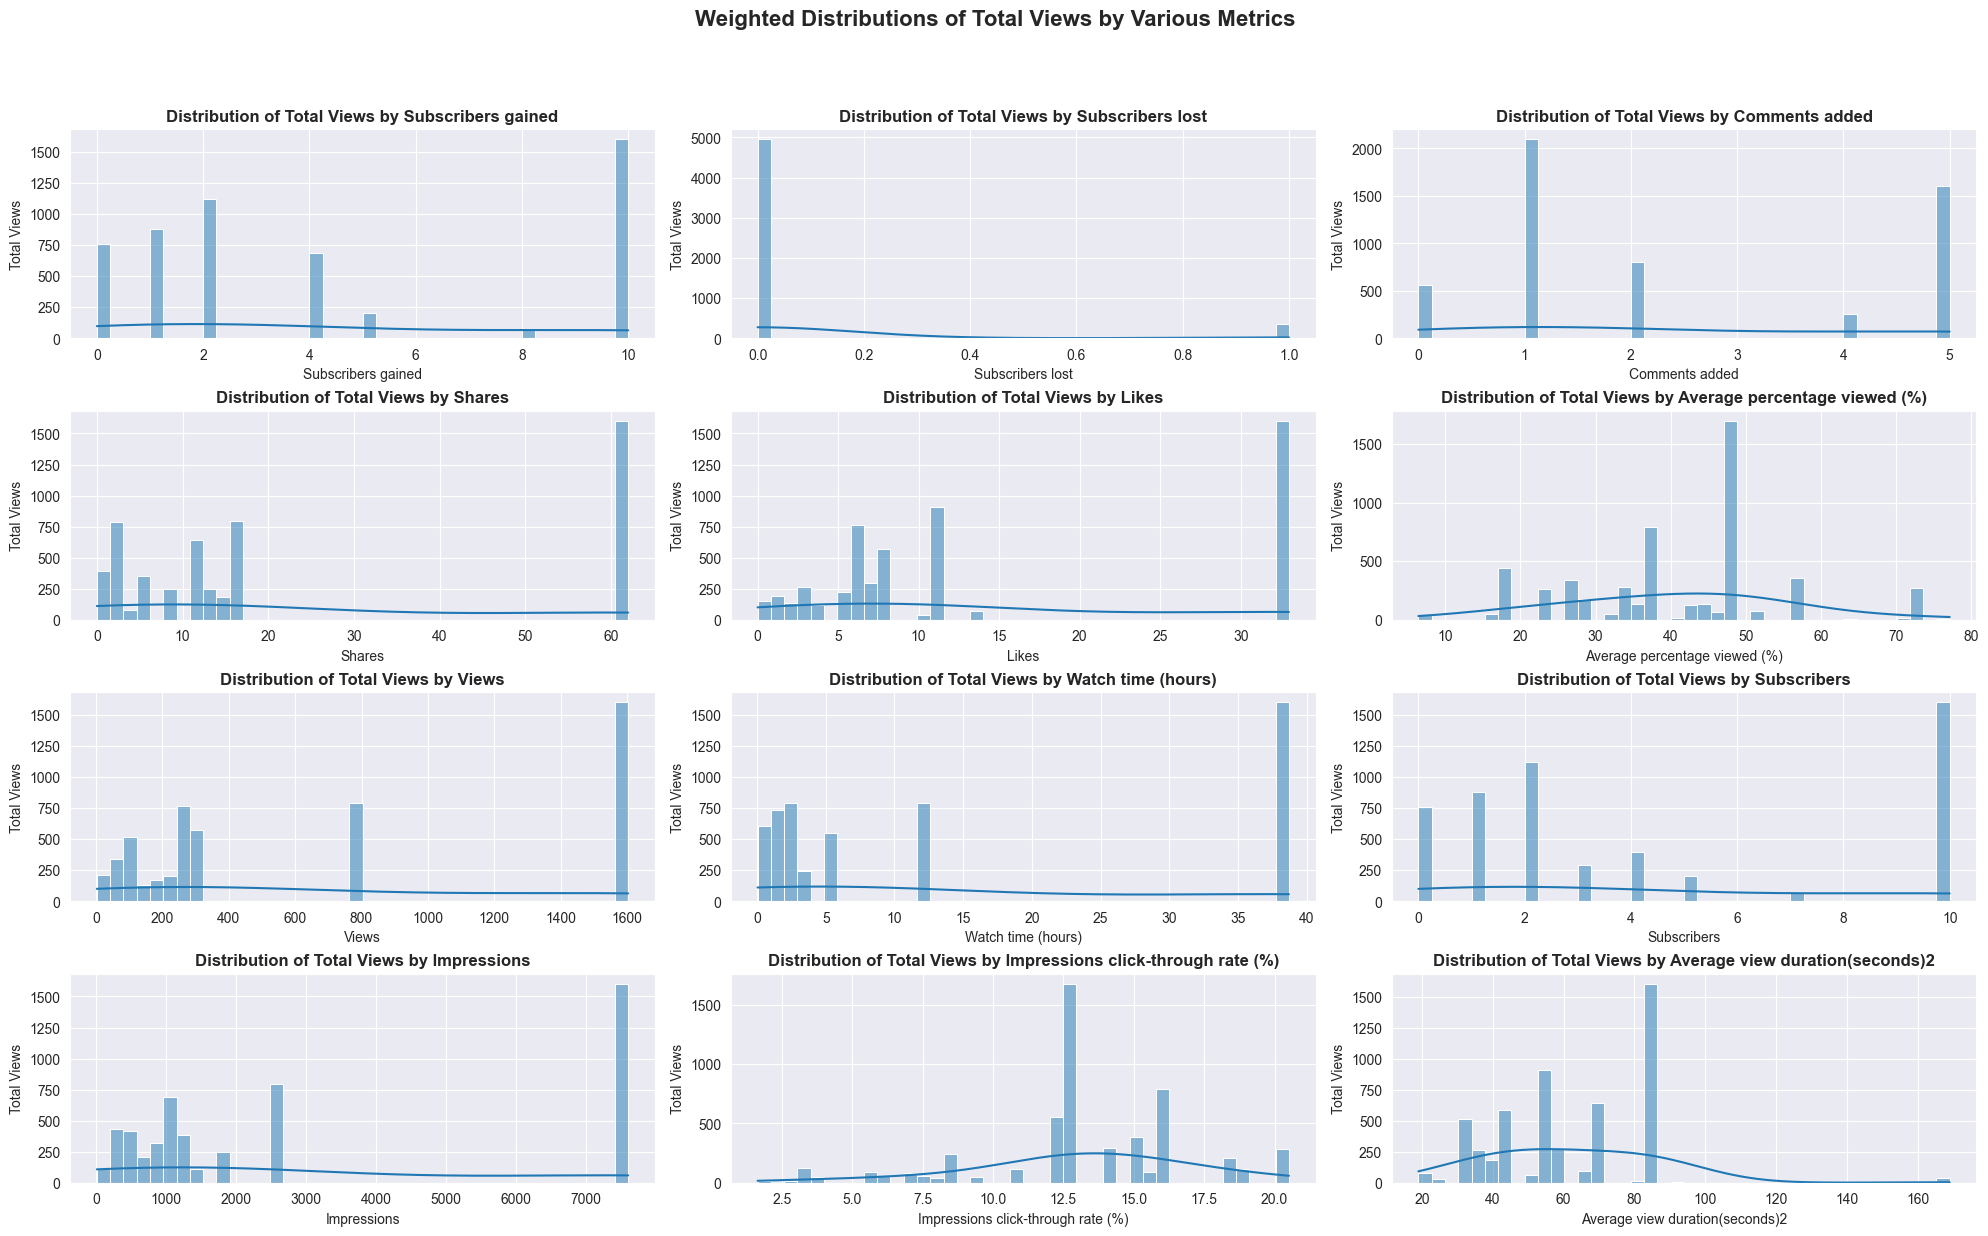

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables for this plot
numeric_hist = ['Subscribers gained', 'Subscribers lost', 'Comments added', 'Shares', 'Likes', 
                'Average percentage viewed (%)', 'Views', 'Watch time (hours)', 'Subscribers', 
                'Impressions', 'Impressions click-through rate (%)', 'Average view duration(seconds)2']

# Set up a larger figure size
plt.figure(figsize=(20, 15))

# Define a color palette for a variety of colors across subplots


# Plotting histograms with enhancements
for i, col in enumerate(numeric_hist):
    plt.subplot(5, 3, i+1)
    
    # Plot with weights for total views and density plot (KDE)
    ax = sns.histplot(x=col, weights=df['Views'], data=df, kde=True, bins=40)
    
  
    # Title and labels with custom font sizes
    plt.title(f'Distribution of Total Views by {col}', fontsize=12, fontweight='bold')
    plt.ylabel('Total Views', fontsize=10)
    plt.xlabel(col, fontsize=10)
    
    # Grid with light styling


# Adjust layout to prevent overlapping and add a main title
plt.tight_layout()
plt.suptitle("Weighted Distributions of Total Views by Various Metrics", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.90)  # Adjust space for the main title

# Show plot
plt.show()



1. Distribution of Total Views by Subscribers Gained: Shows how total views are spread across videos with different levels of subscriber gain. For example, videos that gained more subscribers may have higher views, suggesting popular videos often attract new subscribers.

2. Distribution of Total Views by Subscribers Lost: Illustrates how total views are distributed based on the number of subscribers lost. Most videos have low or no subscriber loss, indicating that videos generally do not lead to unsubscribing.

3. Distribution of Total Views by Comments Added: Demonstrates the relationship between the number of comments on videos and their views. Videos with more comments could have more views, as comments often indicate engagement.

4. Distribution of Total Views by Shares: Shows how often videos were shared in relation to their total views. Videos with higher shares usually tend to have more views, as sharing can increase video exposure.

5. Distribution of Total Views by Dislikes: Displays the distribution of views for videos with different dislike counts. Most videos have few dislikes, indicating that dislikes generally don’t correlate strongly with view count.

6. Distribution of Total Views by Likes: Represents how total views vary with the number of likes a video has received. Videos with more likes often have higher views, as likes are a positive engagement metric.

7. Distribution of Total Views by Viewed vs. Swiped Away (%): Shows how views are distributed based on the percentage of users who viewed versus swiped away. Higher view rates usually indicate that viewers are staying to watch, potentially boosting total views.

8. Distribution of Total Views by Average Percentage Viewed (%): Illustrates how the average percentage of video watched affects total views. Videos with higher percentages watched (like 40-50%) often have more views, as viewers are engaged longer.

9. Distribution of Total Views by Watch Time (hours): Shows how views are distributed based on the watch time accumulated. Videos with higher watch times often correlate with higher view counts, as they retain audiences longer.

10. Distribution of Total Views by Subscribers: Displays total views based on the number of subscribers at the time of video publishing. Channels with more subscribers tend to have higher view counts, reflecting a larger audience base.

11. Distribution of Total Views by Average View Duration (seconds): Shows how views correlate with the average time spent watching a video. Higher view durations can lead to higher total views, as viewers are more engaged.

12. Distribution of Total Views by Impressions: Demonstrates the connection between the number of times videos were shown (impressions) and their views. Higher impressions often lead to more views, as the video is seen by a larger audience.

13. Distribution of Total Views by Impressions Click-Through Rate (%): Represents how the rate of clicks on the video (from impressions) affects views. A higher click-through rate often results in higher views, as more viewers click to watch.

14. Distribution of Total Views by Day: Shows how total views are spread across different days of the month, helping to identify peak days for views.

15. Distribution of Total Views by Month: Illustrates the variation in views by month, indicating any seasonal trends in video performance.

16. Distribution of Total Views by Year: Displays how views have grown over time, with recent years often showing higher views as the channel grows.

In [21]:
#top 10 videos/titles by views
Top_10_Videos_By_Views = df[['Short_title','Views']].sort_values(by='Views',ascending=False).head(10)

#top 10 videos/titles by Watch_time
Top_10_Videos_By_Watch_time = df[['Short_title','Watch time (hours)']].sort_values(by='Watch time (hours)',ascending=False).head(10)

#top 10 videos/titles by Subscribers
Top_10_Videos_By_Subscribers = df[['Short_title','Subscribers']].sort_values(by='Subscribers',ascending=False).head(10)
#op 10 videos/titles by Impressions
Top_10_Videos_By_Impressions = df[['Short_title','Impressions']].sort_values(by='Impressions',ascending=False).head(10)

##op 10 videos/titles by Impressions_click_through_rate
Top_10_Videos_By_Impressions_click_through_rate = df[['Short_title','Impressions click-through rate (%)']].sort_values(by='Impressions click-through rate (%)',ascending=False).head(10)

##op 10 videos/titles by Average view duration(seconds)2
Top_10_Videos_By_Average_view_duration = df[['Short_title','Average view duration(seconds)2']].sort_values(by='Average view duration(seconds)2',ascending=False).head(10)



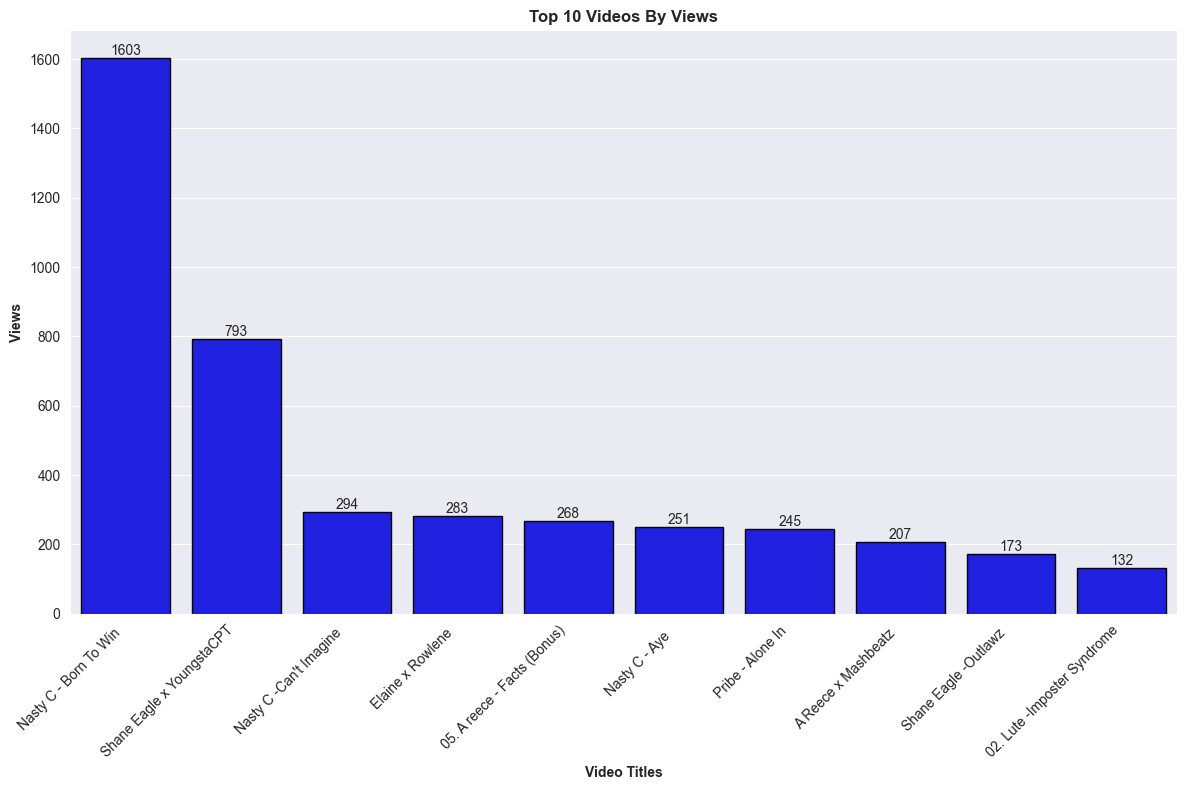

In [22]:
#Let plot bar chart for videos by views
# Set figure size
plt.figure(figsize=(12, 8))

#plot bar
ax =sns.barplot(x='Short_title',y=Top_10_Videos_By_Views['Views'],data=Top_10_Videos_By_Views,color='blue',edgecolor='black')
# Rotate x-axis labels for readability

# Customize gridlines


# Customizing the x and y axis labels
plt.title('Top 10 Videos By Views',fontsize=12,weight='bold')
plt.xlabel('Video Titles', fontsize=10, weight='bold')
plt.ylabel('Views', fontsize=10, weight='bold')
plt.xticks(rotation =45,ha='right')

# Add values on top of each bar
for container in ax.containers:
    ax.bar_label(container)

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

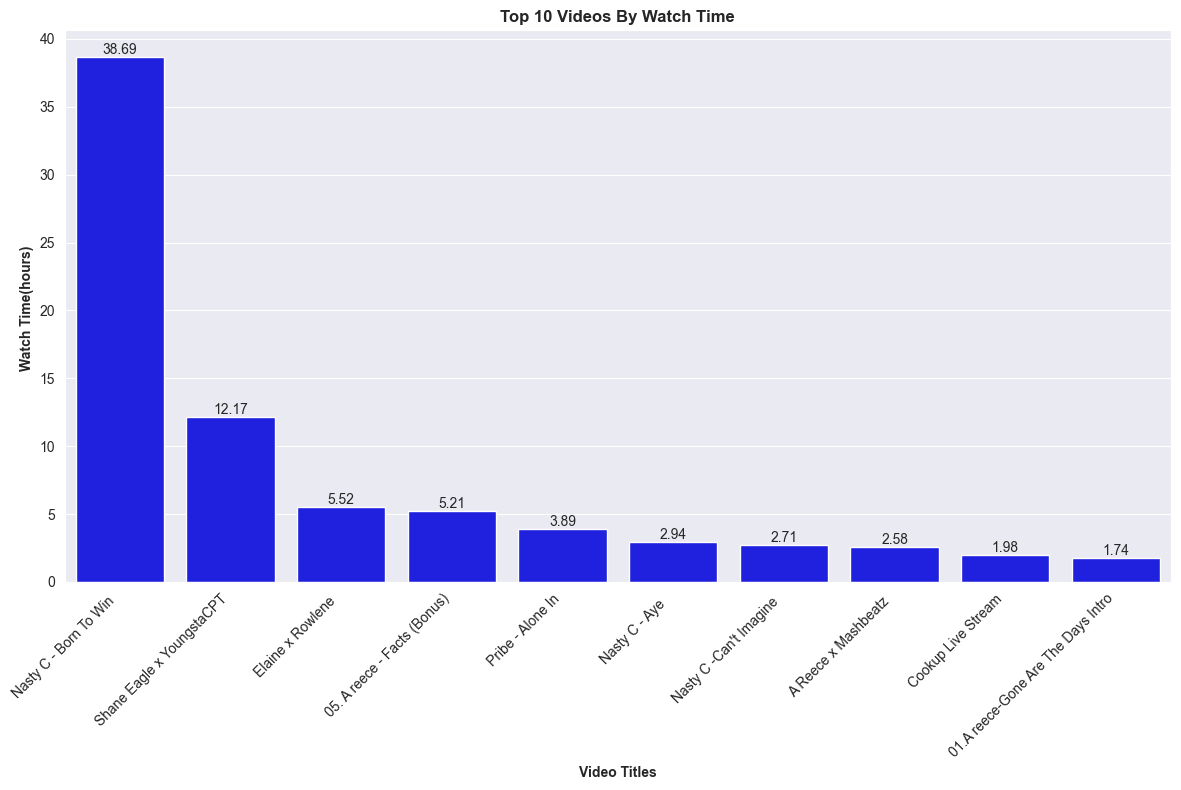

In [23]:
#Top_10_Videos_By_Watch_time
# Set figure size
plt.figure(figsize=(12, 8))

#plot bar
ax =sns.barplot(x='Short_title',y='Watch time (hours)',data=Top_10_Videos_By_Watch_time.round(2),color='blue')
# Rotate x-axis labels for readability
plt.xticks(rotation = 45,ha='right')
# Customizing the x and y axis labels
plt.title('Top 10 Videos By Watch Time',fontsize=12,weight='bold')

plt.xlabel('Video Titles',fontsize=10,weight='bold')
plt.ylabel('Watch Time(hours) ',fontsize=10,weight='bold')

# Add values on top of each bar
for container in ax.containers:
    ax.bar_label(container)


# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

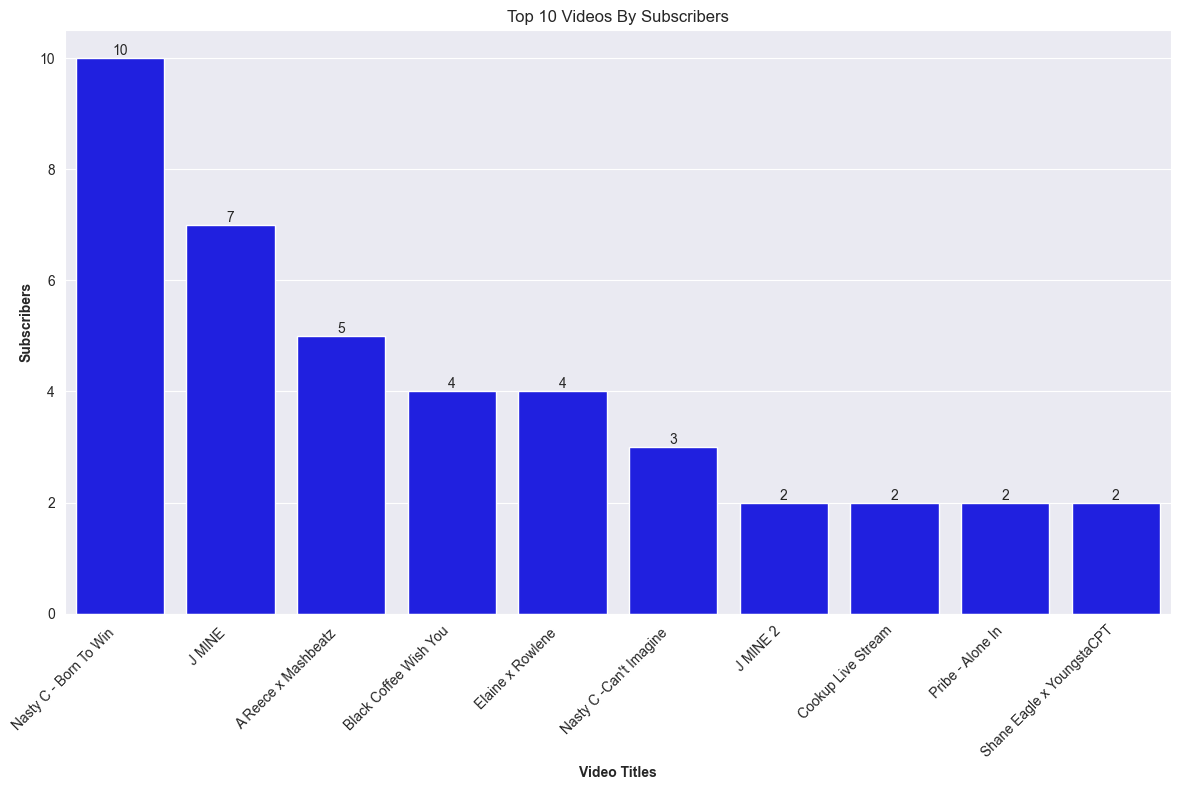

In [24]:
#Top_10_Videos_By_Subscribers
# Set figure size
plt.figure(figsize=(12, 8))

#plot bar
ax =sns.barplot(x='Short_title',y='Subscribers',data=Top_10_Videos_By_Subscribers,color='blue')
# Rotate x-axis labels for readability
plt.xticks(rotation = 45,ha='right')
plt.title('Top 10 Videos By Subscribers')
plt.xlabel('Video Titles',fontsize=10,weight='bold')
plt.ylabel('Subscribers',fontsize=10,weight='bold')

# Add values on top of each bar
for container in ax.containers:
    ax.bar_label(container)


# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

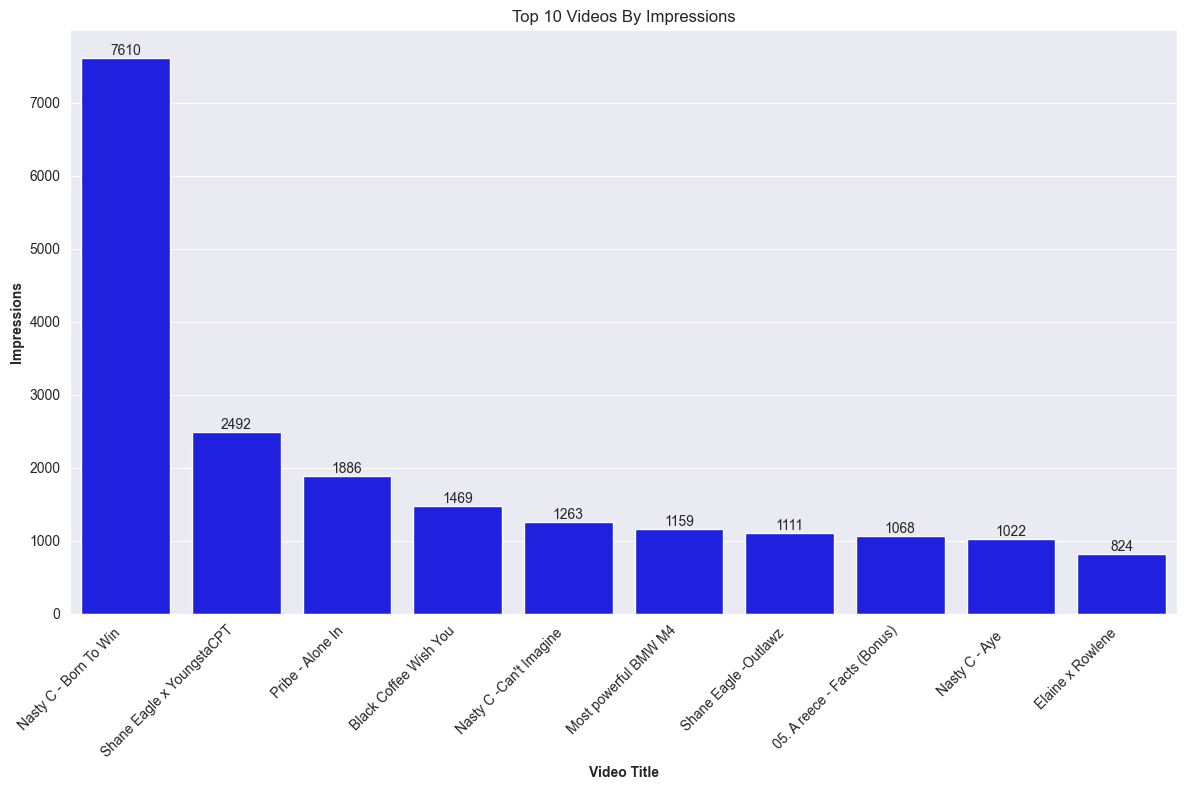

In [25]:
#Let plot Top_10_Videos_By_Impressions
# Set figure size
plt.figure(figsize=(12, 8))
#plot bar
ax =sns.barplot(x='Short_title',y='Impressions',data=Top_10_Videos_By_Impressions,color='blue')
# Rotate x-axis labels for readability
plt.xticks(rotation = 45,ha='right')
plt.title('Top 10 Videos By Impressions')
plt.xlabel('Video Title',fontsize=10,weight='bold')
plt.ylabel('Impressions',fontsize=10,weight='bold')

# Add values on top of each bar
for container in ax.containers:
    ax.bar_label(container)


# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

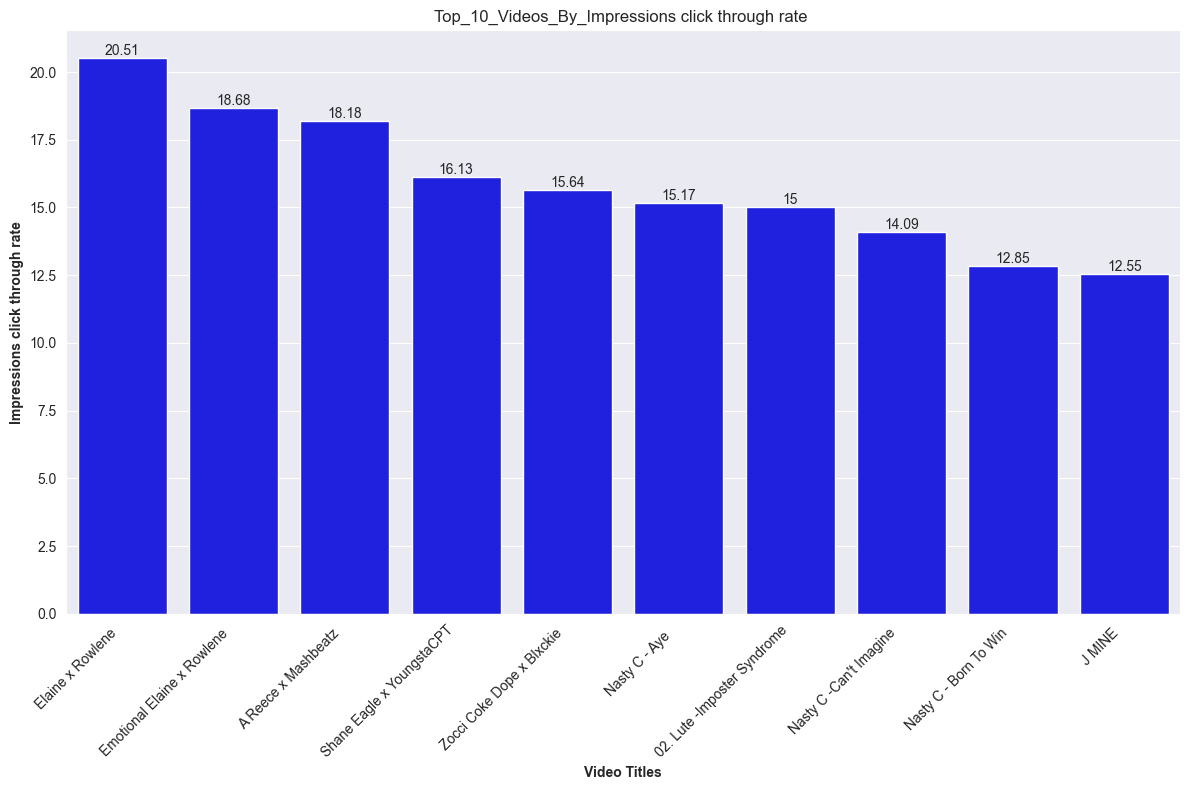

In [26]:
#Top 10 videos/titles by Impressions_click_through_rate
# Set figure size
plt.figure(figsize=(12, 8))

#plot bar
ax =sns.barplot(x='Short_title',y='Impressions click-through rate (%)',data=Top_10_Videos_By_Impressions_click_through_rate,color='blue')
# Rotate x-axis labels for readability
plt.xticks(rotation = 45,ha='right')
plt.title('Top_10_Videos_By_Impressions click through rate ')
plt.xlabel('Video Titles',fontsize=10,weight='bold')
plt.ylabel('Impressions click through rate',fontsize=10,weight='bold')

# Add values on top of each bar
for container in ax.containers:
    ax.bar_label(container)


# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

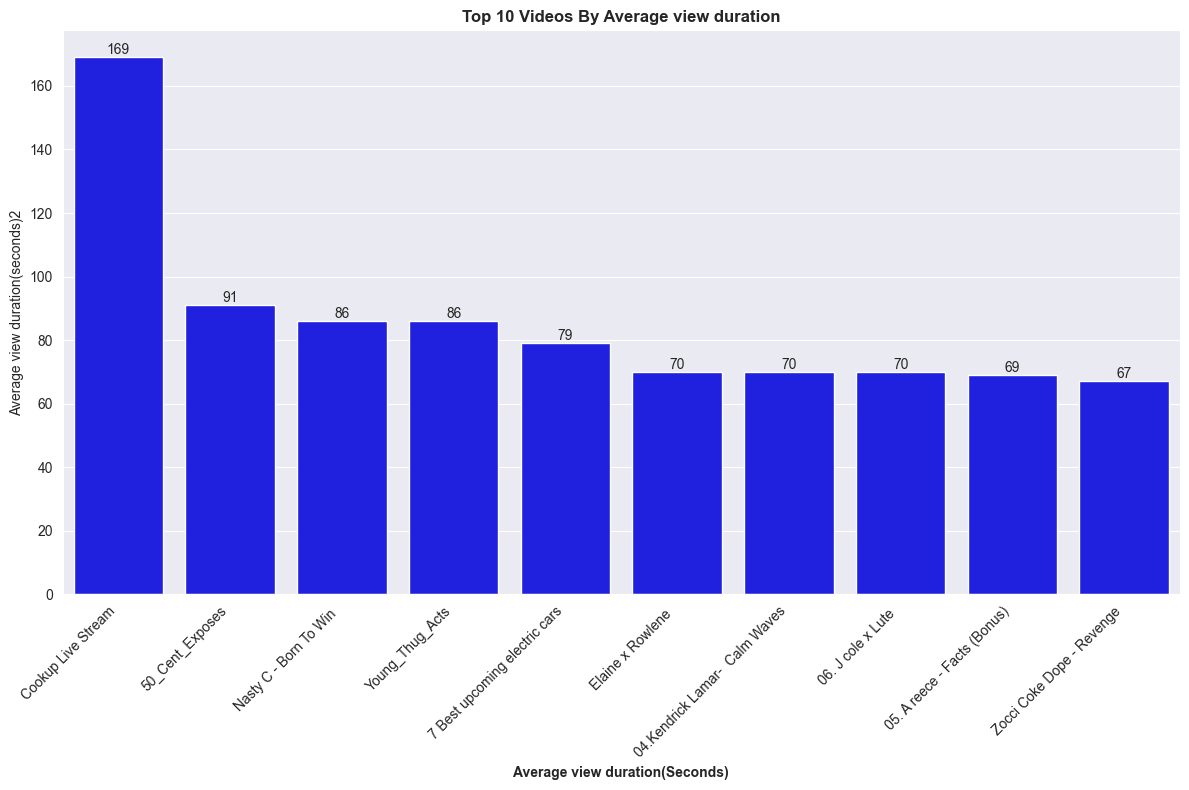

In [27]:
#Top 10 videos/titles by Impressions_click_through_rate
# Set figure size
plt.figure(figsize=(12, 8))

#plot bar
ax =sns.barplot(x='Short_title',y='Average view duration(seconds)2',data=Top_10_Videos_By_Average_view_duration,color='blue')
# Rotate x-axis labels for readability
plt.xticks(rotation = 45,ha='right')
plt.title('Top 10 Videos By Average view duration',fontsize=12,weight='bold')
plt.xlabel('Video Titles',fontsize=10,weight='bold')
plt.xlabel('Average view duration(Seconds)',fontsize=10,weight='bold')

# Add values on top of each bar
for container in ax.containers:
    ax.bar_label(container)


# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

In [28]:
df.columns

Index(['Video title', 'Video publish time', 'Subscribers gained',
       'Subscribers lost', 'Comments added', 'Shares', 'Dislikes', 'Likes',
       'Average percentage viewed (%)', 'Views', 'Watch time (hours)',
       'Subscribers', 'Impressions', 'Impressions click-through rate (%)',
       'Average view duration(seconds)2', 'Short_title', 'Day', 'Month',
       'Year'],
      dtype='object')

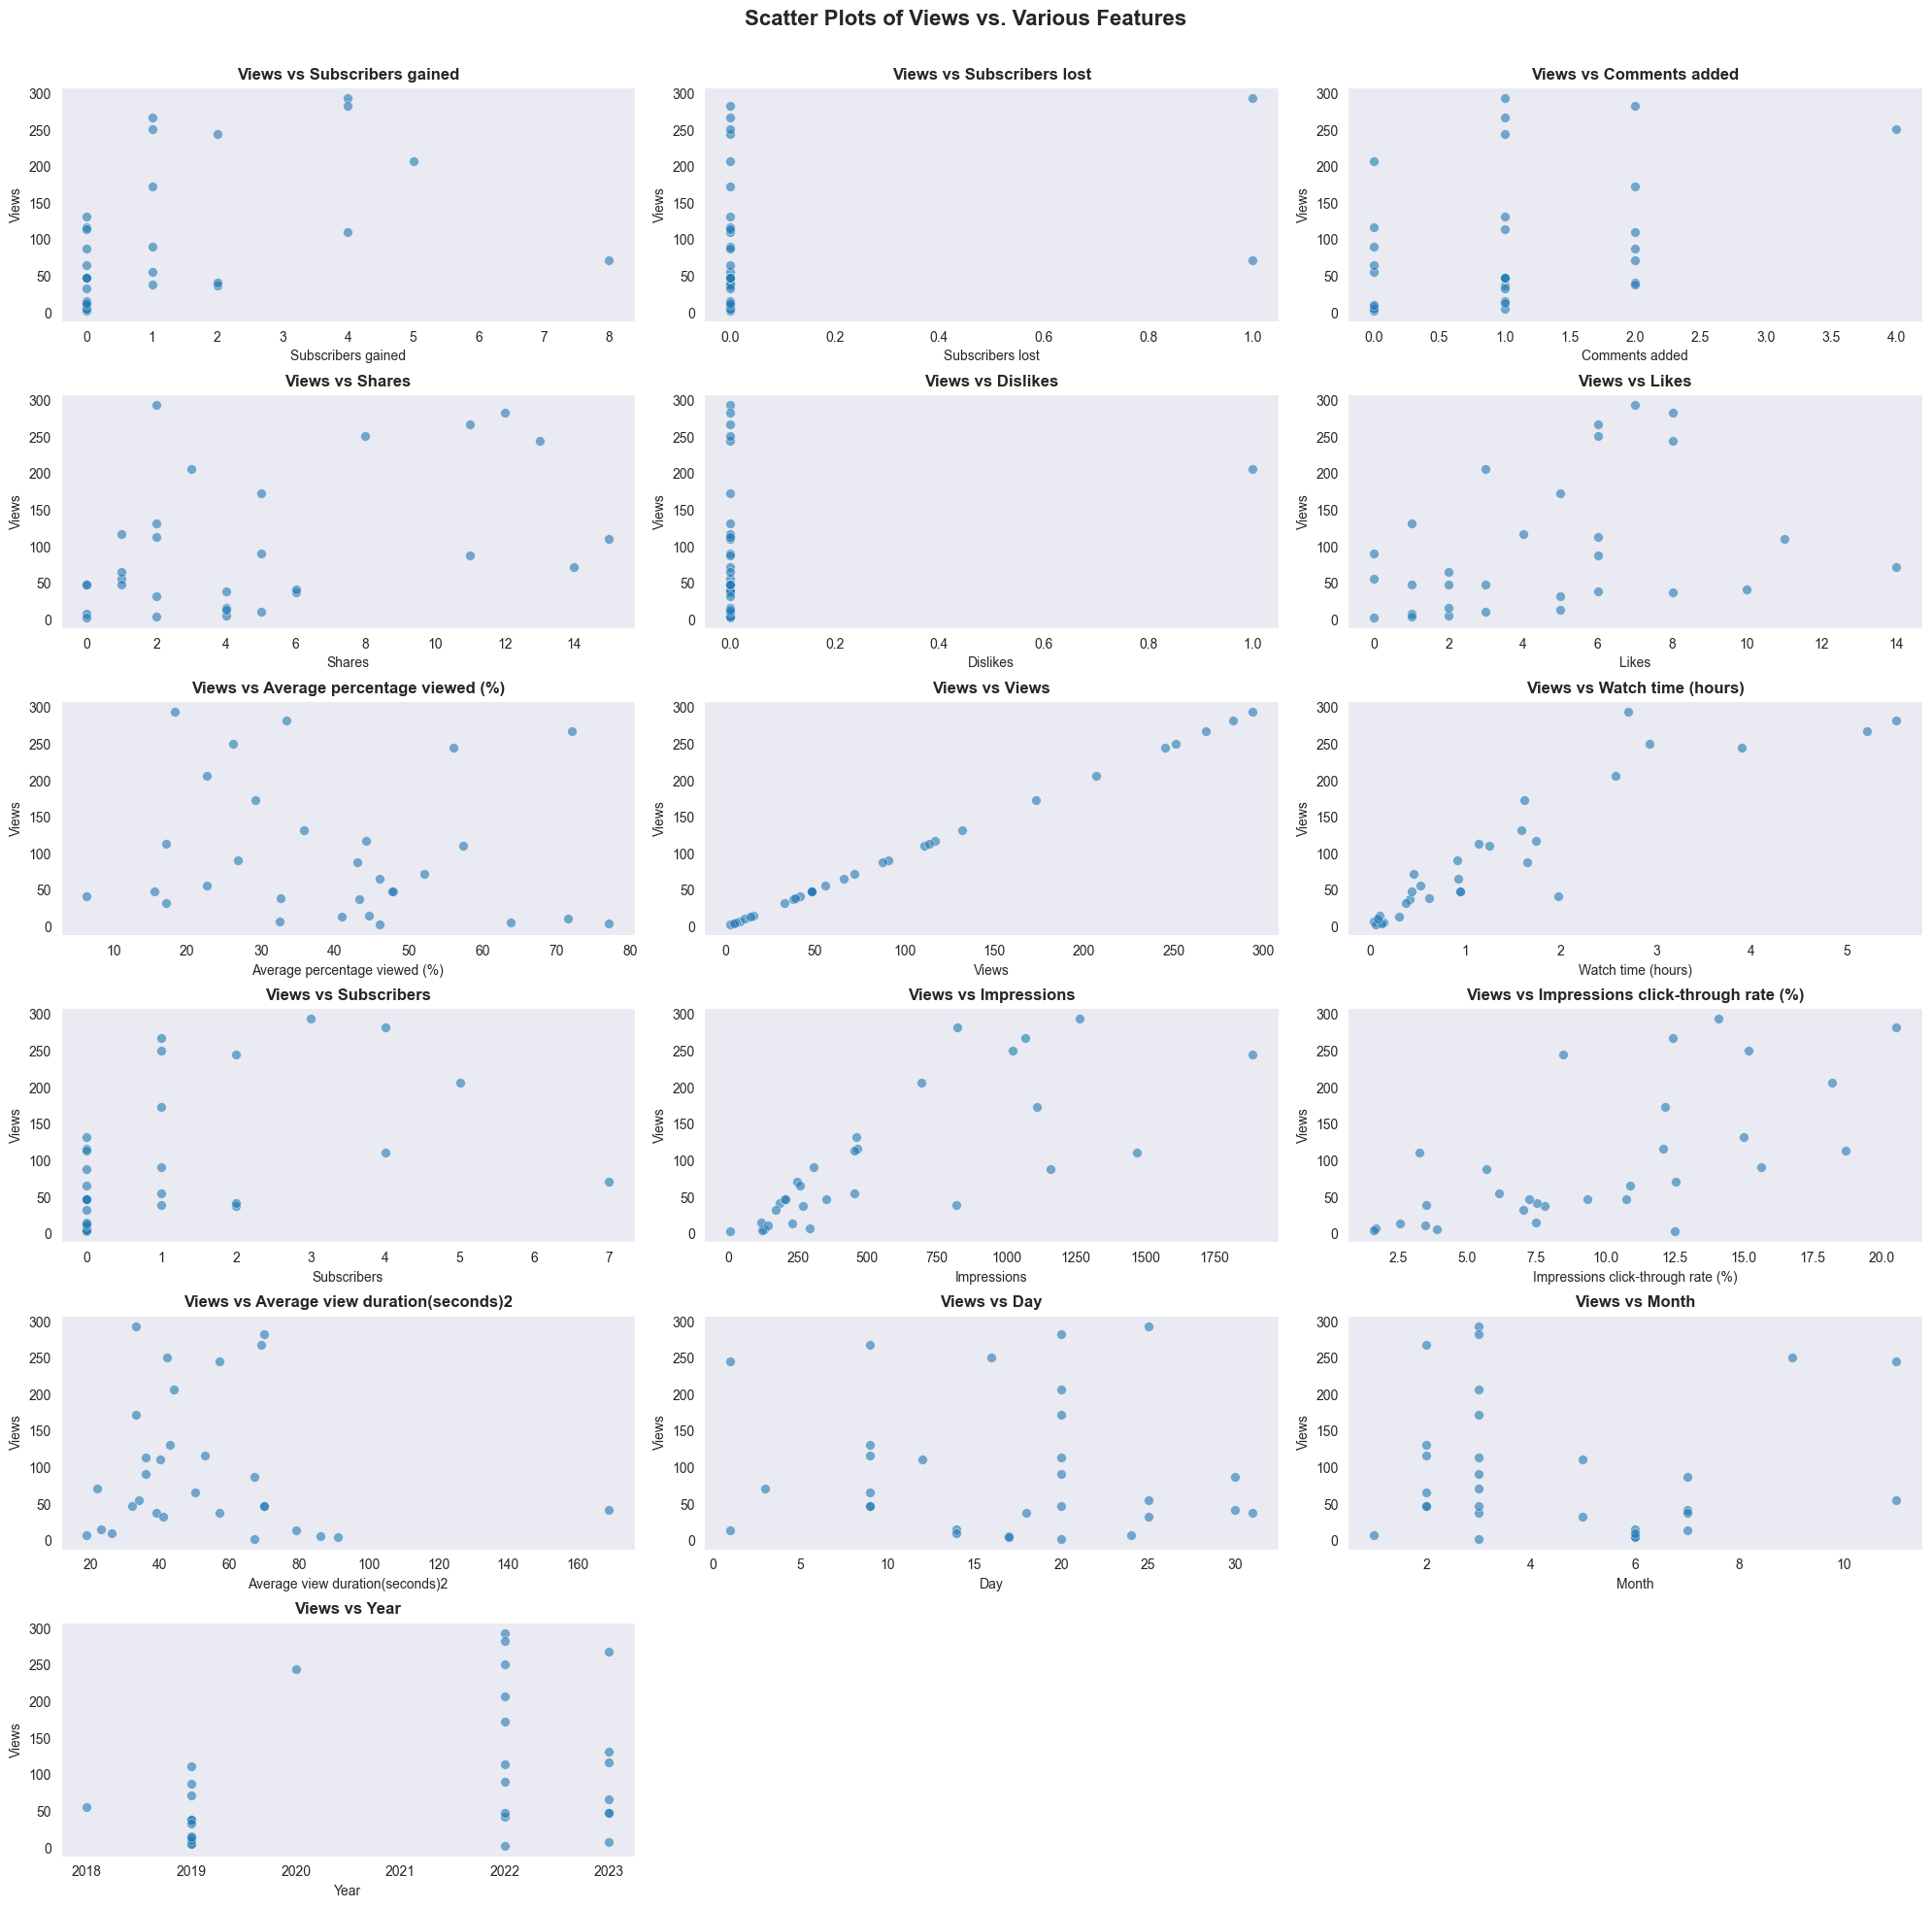

In [61]:


# list of features for the scatter plot
feature = ['Subscribers gained', 'Subscribers lost', 'Comments added', 'Shares', 'Dislikes', 'Likes',
           'Average percentage viewed (%)', 'Views', 'Watch time (hours)', 'Subscribers', 'Impressions', 
           'Impressions click-through rate (%)', 'Average view duration(seconds)2', 'Day', 'Month', 'Year']

# Set up a larger figure size
plt.figure(figsize=(20, 20))

# Use a color palette for variety


# Plot scatter plots with enhancements
for i, col in enumerate(feature):
    plt.subplot(6, 3, i+1)
    
    # Scatter plot with transparency and custom marker style
    sns.scatterplot(x=col, y='Views', data=df, alpha=0.6, s=50, marker='o', edgecolor='w', linewidth=0.5)
    
    # Add title and grid
    plt.title(f'Views vs {col}', fontsize=12, fontweight='bold')
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Views', fontsize=10)
    plt.grid(False)
   

# Adjust layout to prevent overlapping and add a main title
plt.tight_layout()
plt.suptitle("Scatter Plots of Views vs. Various Features", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.94)  # Adjust space for the main title

# Show plot
plt.show()



From these plots, Watch Time and Impressions appear to have a positive relationship with Views, suggesting they could be significant factors in predicting video success. Subscribers and Click-Through Rate, however, show weaker or less consistent correlations with views, indicating they may be secondary factors or impacted by other variables.

In [30]:
Gain= df['Subscribers gained'].sum()
Lost= df['Subscribers lost'].sum()
gain_vs_lost = Gain,Lost 
Total_sub = pd.DataFrame(gain_vs_lost).reset_index()
Total_sub

,index,0
0,0,49
1,1,2


In [31]:
Total_sub.rename(columns={'index' :'gain_vs_lost',0:'Total_subscribers'},inplace=True)
Total_sub

,gain_vs_lost,Total_subscribers
0,0,49
1,1,2


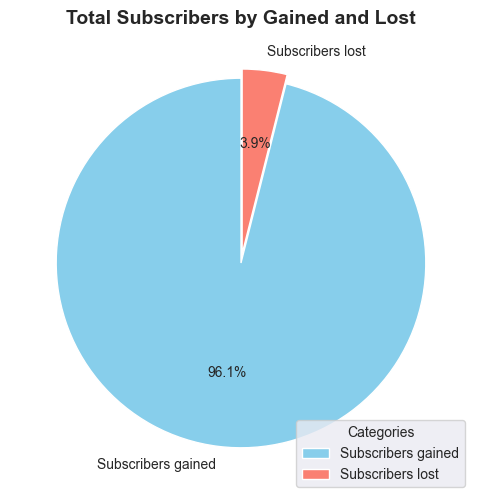

In [32]:
import matplotlib.pyplot as plt

# Sample data
sizes = [49, 2]  # Values for each category
labels = ['Subscribers gained', 'Subscribers lost']  # Labels for the categories

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, explode=(0, 0.05), colors=['skyblue', 'salmon'])
plt.title('Total Subscribers by Gained and Lost', fontsize=14, fontweight='bold')

# Adding the legend
plt.legend(labels, loc='lower right', title='Categories', fontsize=10)

plt.show()



In [33]:

Gain= df['Likes'].sum()
Lost= df['Dislikes'].sum()
gain_vs_lost = Gain,Lost 
Total_likes = pd.DataFrame(gain_vs_lost).reset_index()
#rename
Total_likes.rename(columns={'index' :'gain_vs_lost',0:'Total_likes_Dislike'},inplace=True)
Total_likes



,gain_vs_lost,Total_likes_Dislike
0,0,180
1,1,1


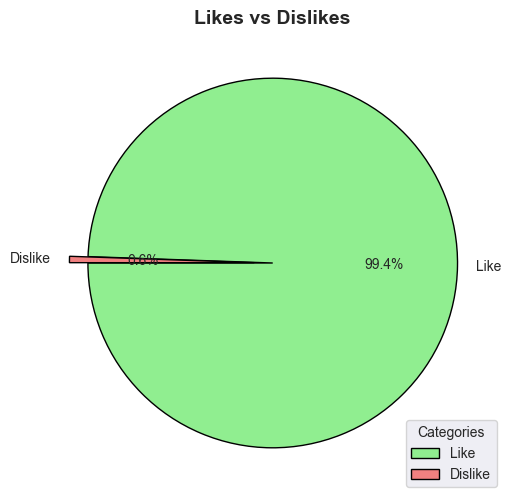

In [34]:
import matplotlib.pyplot as plt

# Sample data
sizes = [180, 1]  # Values for each category
labels = ['Like', 'Dislike']  # Labels for the categories

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(
    sizes, labels=labels, autopct='%1.1f%%', startangle=180, explode=(0, 0.1),
    colors=['lightgreen', 'lightcoral'], wedgeprops={'edgecolor': 'black'}
)
plt.title('Likes vs Dislikes', fontsize=14, fontweight='bold')

# Adding the legend
plt.legend(labels, loc='lower right', title='Categories', fontsize=10)

plt.show()


In [35]:
corr = df.select_dtypes(include=['int32','int64','float64'])

In [36]:
#correlation between variables
corr.corr()

,Subscribers gained,Subscribers lost,Comments added,Shares,Dislikes,Likes,Average percentage viewed (%),Views,Watch time (hours),Subscribers,Impressions,Impressions click-through rate (%),Average view duration(seconds)2,Day,Month,Year
Subscribers gained,1.00,0.48,0.56,0.76,0.26,0.82,-0.01,0.67,0.66,1.00,0.68,0.33,0.03,-0.07,0.14,-0.02
Subscribers lost,0.48,1.00,0.08,0.03,-0.05,0.21,-0.07,0.01,-0.05,0.40,-0.01,0.17,-0.24,-0.09,-0.16,-0.08
Comments added,0.56,0.08,1.00,0.73,-0.19,0.77,-0.10,0.61,0.63,0.58,0.67,0.16,0.23,0.06,0.39,-0.00
Shares,0.76,0.03,0.73,1.00,-0.06,0.93,0.19,0.90,0.94,0.79,0.94,0.16,0.20,-0.08,0.35,-0.01
Dislikes,0.26,-0.05,-0.19,-0.06,1.00,-0.08,-0.18,0.02,-0.01,0.28,-0.02,0.29,-0.07,0.08,-0.11,0.10
Likes,0.82,0.21,0.77,0.93,-0.08,1.00,0.04,0.84,0.86,0.84,0.87,0.17,0.23,-0.04,0.29,-0.02
Average percentage viewed (%),-0.01,-0.07,-0.10,0.19,-0.18,0.04,1.00,0.02,0.07,0.00,0.07,-0.39,0.05,-0.55,0.04,-0.24
Views,0.67,0.01,0.61,0.90,0.02,0.84,0.02,1.00,0.98,0.70,0.96,0.37,0.14,-0.01,0.21,0.24
Watch time (hours),0.66,-0.05,0.63,0.94,-0.01,0.86,0.07,0.98,1.00,0.70,0.97,0.27,0.23,-0.01,0.25,0.21
Subscribers,1.00,0.40,0.58,0.79,0.28,0.84,0.00,0.70,0.70,1.00,0.71,0.33,0.06,-0.07,0.16,-0.02


In [37]:
corr.corr()['Views'].sort_values(ascending=False)

Views                                                1.00
Watch time (hours)                                   0.98
Impressions                                          0.96
Shares                                               0.90
Likes                                                0.84
Subscribers                                          0.70
Subscribers gained                                   0.67
Comments added                                       0.61
Impressions click-through rate (%)                   0.37
Year                                                 0.24
Month                                                0.21
Average view duration(seconds)2                      0.14
Dislikes                                             0.02
Average percentage viewed (%)                        0.02
Subscribers lost                                     0.01
Day                                                 -0.01
Name: Views, dtype: float64

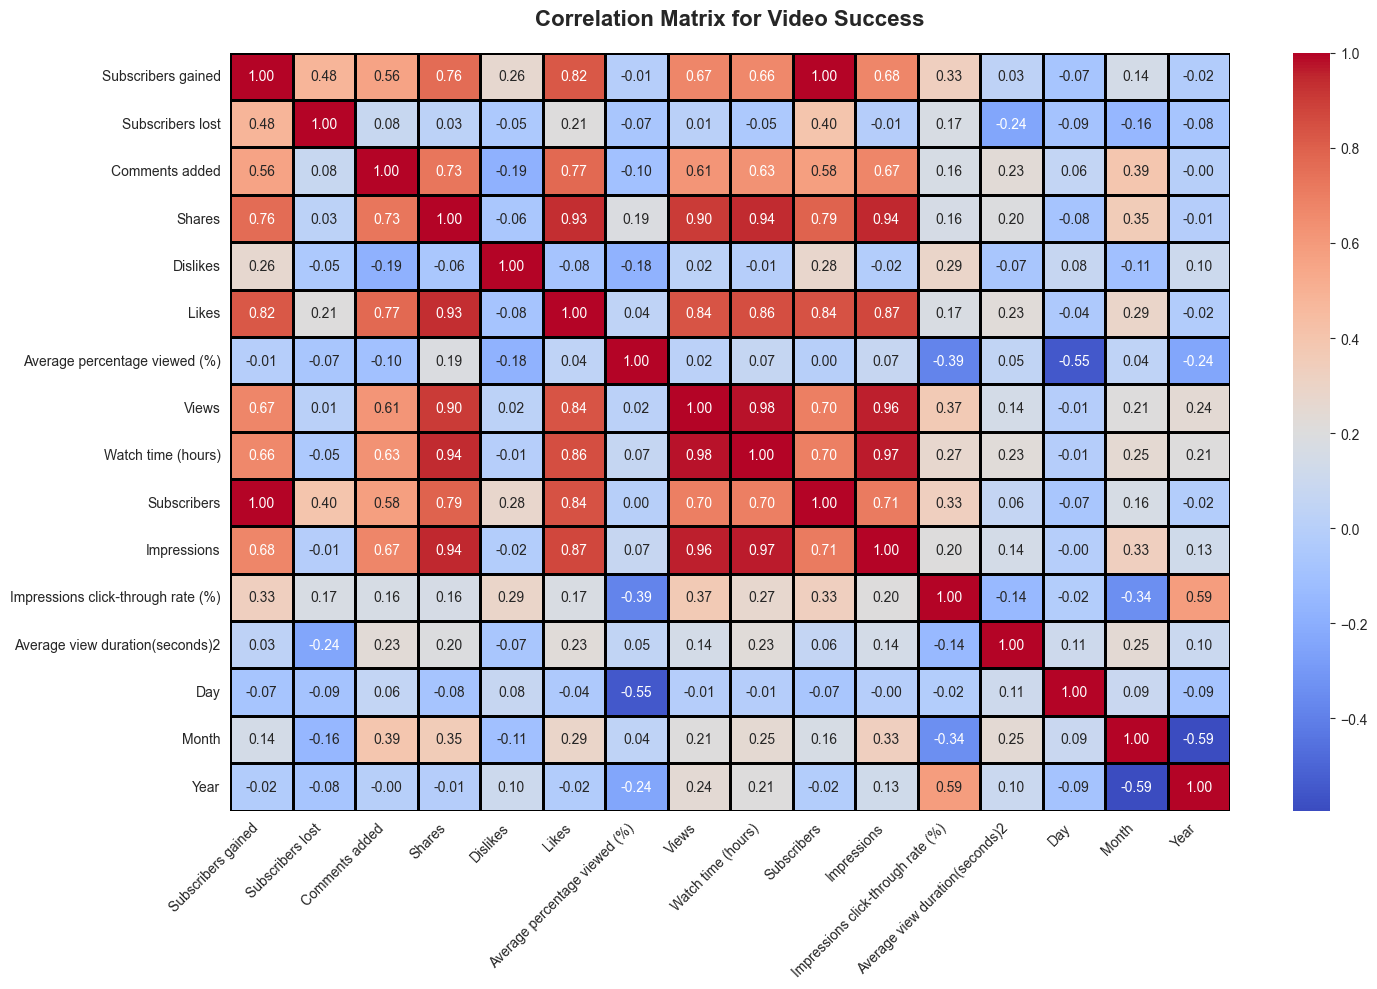

In [38]:
#ploting Heatmap/correlation matrix


plt.figure(figsize=(15, 10))
sns.heatmap(
    data=corr.corr(), annot=True, cmap='coolwarm', fmt='.2f',
    linewidths=1, linecolor='black', annot_kws={"size": 10},
    
)

# Title and labels with styling
plt.title('Correlation Matrix for Video Success', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Show the heatmap
plt.tight_layout()
plt.show()

SUMMARY OF CORRELATION 

1. Shares: High positive correlation (0.90) – This indicates that videos that are shared more tend to have higher views.
2. Watch Time (hours): High positive correlation (0.98) – Longer watch time is strongly associated with higher views, suggesting that longer engagement contributes significantly to video success.
3. Subscribers Gained: Strong positive correlation (0.67) – Videos that attract more subscribers also tend to have higher views, possibly because engaging content encourages viewers to subscribe.
4. Likes: Strong positive correlation (0.92) – Videos with more likes tend to have higher views, indicating that viewer appreciation is linked to popularity.
5. Impressions: High positive correlation (0.96) – This suggests that videos shown more often to audiences (impressions) generally result in more views.
6. Subscribers: Positive correlation (0.70) – Channels with more subscribers tend to get more views, though this effect is slightly weaker than other factors.

Less Influential Variables:
1. Average View Duration (seconds): Positive but weaker correlation (0.14) – Although longer viewing duration has a positive influence, its impact on overall views is relatively lower.
2. Impressions Click-Through Rate (%): Moderate correlation (0.37) – A higher click-through rate moderately increases views, as more people are likely to watch the video when they see it.
3. Dislikes: Very weak correlation (-0.08) – The number of dislikes shows little to no relationship with the number of views.
4. Day, Month, Year: These temporal variables show almost no significant correlation with views, indicating that time-based factors (e.g., when a video was uploaded) may not play a major role in view count.

In [39]:
#dealing with outliers 

Q1 = df['Views'].quantile(0.25)
Q3 = df['Views'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['Views'] >= lower_bound) & (df['Views'] <= upper_bound)]


#### **4. MODEL DEVELOPMENT**

**Feature Engineering**

In [40]:
#Model variables
model = df.select_dtypes(include=['int32','int64','float64'])
model.columns

Index(['Subscribers gained', 'Subscribers lost', 'Comments added', 'Shares',
       'Dislikes', 'Likes', 'Average percentage viewed (%)', 'Views',
       'Watch time (hours)', 'Subscribers', 'Impressions',
       'Impressions click-through rate (%)', 'Average view duration(seconds)2',
       'Day', 'Month', 'Year'],
      dtype='object')

<Axes: xlabel='Watch time (hours)', ylabel='Views'>

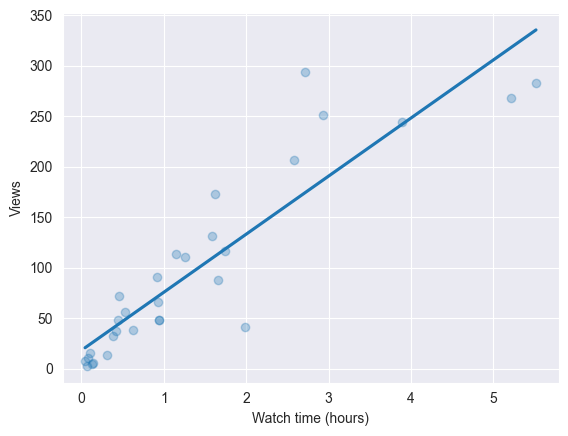

In [41]:
#Lets plot a simple regression line 
sns.regplot(
    x=df['Watch time (hours)'],
    y=df['Views'],
    scatter_kws={'alpha':0.3},
    ci=None,
    data=df)

In [42]:

Model_feature = model.drop(columns=['Views'])


In [43]:
X =Model_feature
X[:5]


,Subscribers gained,Subscribers lost,Comments added,Shares,Dislikes,Likes,Average percentage viewed (%),Watch time (hours),Subscribers,Impressions,Impressions click-through rate (%),Average view duration(seconds)2,Day,Month,Year
2,8,1,2,14,0,14,52.07,0.46,7,247,12.55,22,3,3,2019
3,5,0,0,3,1,3,22.62,2.58,5,693,18.18,44,20,3,2022
4,4,0,2,15,0,11,57.44,1.26,4,1469,3.27,40,12,5,2019
5,4,1,1,2,0,7,18.34,2.71,3,1263,14.09,33,25,3,2022
6,4,0,2,12,0,8,33.42,5.52,4,824,20.51,70,20,3,2022


In [44]:
#Target variable

y = df['Views']
y[:5]

2     72
3    207
4    111
5    294
6    283
Name: Views, dtype: int64

Importing Model Libraries

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


In [46]:
#Slpiting data 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 15)
(6, 15)
(24,)
(6,)


**Data Standardization**

In [47]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5]

array([[ 0.36791711, -0.30151134, -0.12874232,  1.60509684,  0.        ,
         0.82055684,  0.78222026,  1.594832  ,  0.45720127,  2.56644367,
        -0.07734021,  0.02709798, -1.8329473 ,  2.5836922 , -0.51745489],
       [-0.67090767, -0.30151134, -0.12874232, -0.32101937,  0.        ,
        -0.03567638, -0.03939271, -0.72944525, -0.69783352, -0.69301205,
        -1.26311154,  0.74248472, -1.8329473 ,  0.98346994, -1.10883191],
       [-0.67090767, -0.30151134, -0.12874232, -0.32101937,  0.        ,
        -0.89190961,  1.20470202, -0.83555384, -0.69783352, -0.89795969,
        -0.99736992,  0.97010777,  0.03899888,  0.58341437, -1.10883191],
       [-0.67090767, -0.30151134, -0.12874232, -0.74904519,  0.        ,
        -0.03567638, -1.33236066, -0.68329417, -0.69783352, -0.81322172,
        -0.37126655, -0.49318328,  0.97497197,  0.1833588 , -1.10883191],
       [ 3.48439143,  3.31662479,  0.90119626,  1.81910976,  0.        ,
         2.5330233 ,  0.56446296, -0.63163348, 

In [48]:
X_test_scaled[0:5]

array([[-0.67090767, -0.30151134, -0.12874232, -0.74904519,  0.        ,
        -1.17732069, -0.31905609,  0.10082045, -0.69783352, -0.24370376,
         1.23526236, -0.42814812, -0.89697421, -1.0168079 ,  1.25667616],
       [-0.67090767, -0.30151134, -0.12874232, -1.17707102,  0.        ,
        -1.17732069,  0.33801708, -0.3160301 , -0.69783352, -0.75016091,
         0.09982088,  0.44982651, -0.89697421, -1.0168079 ,  1.25667616],
       [-0.67090767, -0.30151134, -0.12874232, -0.32101937,  0.        ,
        -0.89190961,  0.16315959, -0.86174069, -0.69783352, -0.91372489,
        -0.27463323, -1.0784997 , -0.31199103,  0.58341437, -1.10883191],
       [ 1.92615427, -0.30151134, -1.1586809 , -0.53503228,  1.        ,
        -0.60649854, -1.03477711,  0.74051848,  2.18975347,  0.21545777,
         1.87545809, -0.39563054,  0.38998879, -0.61675233,  0.66529914],
       [-0.67090767, -0.30151134, -0.12874232, -0.74904519,  0.        ,
         0.24973469, -1.3345328 , -0.18820717, 

In [49]:
lm = LinearRegression()

In [50]:
lm.fit(X_train,y_train)

LinearRegression()

In [51]:
# the coefficients
lm.coef_

array([ 2.05611518e+01,  3.83833327e+01,  1.27369984e+01, -4.80245899e+00,
        1.24344979e-14, -2.81946881e+00,  1.14764972e-01,  4.39491838e+01,
       -1.78221810e+01,  6.37705193e-02,  3.29476680e+00, -3.57758947e-01,
       -5.92403911e-01,  9.68048399e-01, -2.71460953e+00])

In [52]:
# The coefficients in a dataframe
feature_names = ['Subscribers gained', 'Subscribers lost', 'Comments added', 'Shares',
       'Dislikes', 'Likes', 'Average percentage viewed (%)',
       'Watch time (hours)', 'Subscribers', 'Impressions',
       'Impressions click-through rate (%)', 'Average view duration(seconds)2',
       'Day', 'Month', 'Year']  
cdf = pd.DataFrame(lm.coef_, feature_names, columns=['coef'])
print(cdf)

                                                   coef
Subscribers gained                                20.56
Subscribers lost                                  38.38
Comments added                                    12.74
Shares                                            -4.80
Dislikes                                           0.00
Likes                                             -2.82
Average percentage viewed (%)                      0.11
Watch time (hours)                                43.95
Subscribers                                      -17.82
Impressions                                        0.06
Impressions click-through rate (%)                 3.29
Average view duration(seconds)2                   -0.36
Day                                               -0.59
Month                                              0.97
Year                                              -2.71


## Training the model with multivariable regression using OLS

Allows us to get more details about the moel

In [53]:
import statsmodels.api as sm
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Views   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     39.90
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           7.64e-07
Time:                        18:38:25   Log-Likelihood:                -96.076
No. Observations:                  24   AIC:                             220.2
Df Residuals:                      10   BIC:                             236.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

## Predicting Test Data
Now that the model is trained, we should be able to use it to make our predictions and evaluate our model. The scatter plot below plots the actual y values to the model's predictions. The model seems to behave accurately.

In [54]:
predictions = lm.predict(X_test)
predictions

array([136.22323796,  74.32209222,  32.08448971, 190.74488961,
       111.85926462,  72.4351288 ])

Mean Squared Error: 251.387317935462


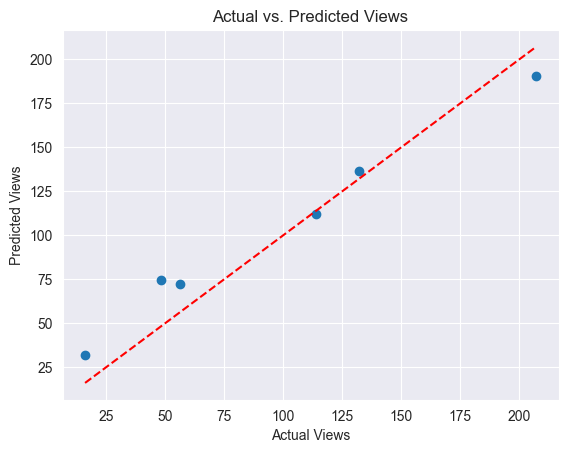

In [55]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, predictions)
plt.xlabel("Actual Views")
plt.ylabel("Predicted Views")
plt.title("Actual vs. Predicted Views")

# Plot y=x line to see how close predictions are to actual values
min_val = min(min(y_test), min(predictions))
max_val = max(max(y_test), max(predictions))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.show()


### **5. MODEL EVALUATION**

In [56]:

print('R2_score:',r2_score(y_test, predictions))
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))


R2_score: 0.9377843996282397
Mean Absolute Error: 13.576799077023376
Mean Squared Error: 251.387317935462
Root Mean Squared Error: 15.855198451468906


<Axes: xlabel='Views', ylabel='Density'>

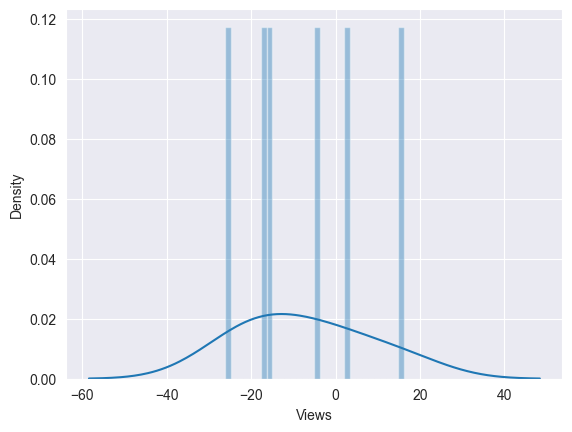

In [57]:
residuals = y_test-predictions
sns.distplot(residuals, bins=30)

In [58]:
np.mean(y_test-predictions)

-7.444850486744751

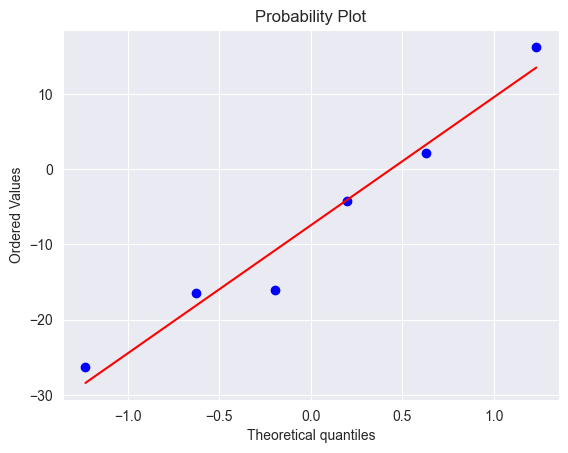

In [59]:
import pylab 
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

#### **Project Conclusion: Predictive Model for Video Success**

In this project, I developed a predictive model that estimates the success of videos based on various factors like watch time, timing of upload,likes,Impressions and the number of subscribers, etc . The goal was to 
understand what contributes to a video’s performance and help content creators and marketers optimize their strategies.



**Key Findings:**

High Predictive Power: The model explains 94% of the variation in video performance, which means it does a great job predicting which videos will perform well. This is based on a measure called 

R², which tells us how much of the outcome (views) is captured by the model.
Accurate Predictions: On average, the model's predictions are off by just 14 views, making it a reliable tool for predicting video success.

Important Factors: The most important factors influencing success were video length, the timing of the upload, and the number of subscribers, which means these are key areas content creators can 

focus on to increase their video’s chances of success.



**What We Can Improve:**

While the model performs well overall, it could still make larger errors for extreme cases, like videos that either go viral or fail to get attention. To improve this, we can add more data, such 

as comments or social media mentions, to make the model even better at predicting these outliers.



**Next Steps:**

The model can be further improved by adding more features and experimenting with advanced techniques to capture complex patterns.

Content creators and marketers can use the insights from this model to strategically plan video releases, focus on high-impact factors like timing and length, and better understand what drives 

engagement.

In [ ]:
df.to_csv('Dash Video data.csv',index=False) #FOR DASH /REPORT